<a href="https://colab.research.google.com/github/dcreeder89/MNIST-Exercise-with-PCA/blob/main/Reeder_PCA_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA Exercise
- Christina Reeder
- 31 Jan 2023

Your task is to perform PCA to speed up a classification algorithm on a high-dimensional dataset. You will fit a model on the original scaled data, and a different one on data after transformation using a PCA model. You will compare the computation time and the evaluation scores.

We will use the [MNIST digits dataset](https://en.wikipedia.org/wiki/MNIST_database), which comes pre-installed in sklearn. This dataset has 28x28 pixel images of handwritten digits 0-9. Your task is to classify these to determine which digits they are.

Use PCA to lower the dimensions in this dataset while retaining 95% of the variance. You can do this when instantiating the PCA by giving the `n_components=` argument a float between 0 and 1.

In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import ConfusionMatrixDisplay, classification_report

## 1. Load the Data

In [5]:
# load dataset
#from sklearn.datasets import fetch_openml
#mnist = fetch_openml('minst_784')
# view shape of the dataset
#mnist.data.shape

The dataset has shape (70000, 784), meaning we are working with 70,000 images with 784 dimensions!

Note that you can access the X data using `mnist.data` and access the target using `mnist.target`.

If you get an error using the above code, you can also load the data using:

In [6]:
from keras.datasets import mnist
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

## 2. Prepare the Data

Prepare the data for modeling. Scale and apply PCA to your data, while retaining 95% of the variance. Be sure not to leak information.

In [14]:
# instantiate PCA
pca = PCA(n_components=0.95, random_state=42)
# instantiate scaler
scaler = StandardScaler()
# create transformer pipeline
transformer = make_pipeline(scaler, pca)

## 3. Create 2 KNN models

a. One that that uses the PCA transformed data to predict which number each image shows.

b. One that uses the original data, without the PCA transformation (but, remember you still need to scale the data!)

In [8]:
# instantiate KNN model
knn = KNeighborsClassifier()

### PCA model

In [15]:
# create knn pipeline with pca transformer
knn_pca_pipe = make_pipeline(transformer, knn)
# fit knn/pca pipeline to training data
knn_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca',
                                  PCA(n_components=0.95, random_state=42))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

### Non-PCA model

In [10]:
# create knn pipeline without the pca transformer, only the scaler
knn_pipe = make_pipeline(scaler, knn)
# fit knn pipeline to training data
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

## 4. Evaluate and compare models

Use separate cells to make predictions using each model. Include the cell magic command: `%%time` at the top of your cells when making predictions to see which model can create predictions faster, the one trained on PCA data or the one trained on non-PCA data. Evaluate both models using multiple appropriate metrics.

'%%time' will output under the cell a count of how long it takes the code in that cell to run.

### PCA model

In [16]:
%%time
preds_pca = knn_pca_pipe.predict(X_test)

CPU times: user 37.6 s, sys: 2.3 s, total: 39.9 s
Wall time: 27 s


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.96      0.99      0.98      1135
           2       0.96      0.94      0.95      1032
           3       0.94      0.96      0.95      1010
           4       0.95      0.94      0.95       982
           5       0.94      0.93      0.93       892
           6       0.96      0.97      0.97       958
           7       0.94      0.93      0.93      1028
           8       0.96      0.91      0.93       974
           9       0.93      0.92      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



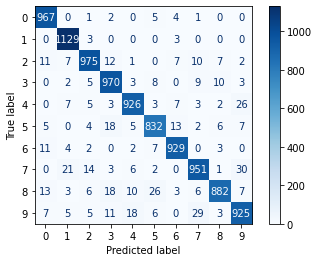

In [20]:
# display model metrics and confusion matrix for PCA model
print(classification_report(y_test, preds_pca))

ConfusionMatrixDisplay.from_predictions(y_test, preds_pca, cmap='Blues')

### Non-PCA model

In [13]:
%%time
preds_no_pca = knn_pipe.predict(X_test)

CPU times: user 1min 13s, sys: 3.17 s, total: 1min 16s
Wall time: 49.7 s


              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.99      0.97      1135
           2       0.96      0.93      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.94      0.94      0.94       982
           5       0.93      0.92      0.93       892
           6       0.96      0.97      0.97       958
           7       0.94      0.92      0.93      1028
           8       0.96      0.90      0.93       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



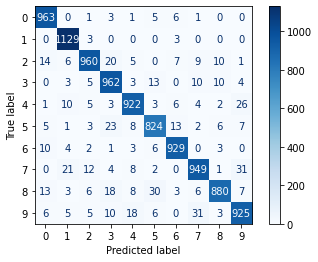

In [21]:
print(classification_report(y_test, preds_no_pca))

ConfusionMatrixDisplay.from_predictions(y_test, preds_no_pca, cmap='Blues')

## 5. Answer Questions

### a. Which model performed the best on the test set?

The model with the PCA had a higher overall accuracy of 95% compared to the model without PCA whose accuracy score was 94%. This means that the model with PCA was overall better at predicting the handwritten numbers in this model. 

### b. Which model was the fastest at making predictions?

The model that utilized PCA was faster at making predictions on the test set. The PCA model was 36.1 seconds faster in the CPU times and 22.7 seconds faster in the Wall times. 

In [18]:
# calculate CPU times differences
60+16 - 39.9

36.1

In [19]:
# calculate Wall time difference
49.7 - 27

22.700000000000003